In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint 

__Задача:__ предсказание баллов ЕГЭ ученика

In [21]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [22]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [23]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [24]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [25]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [26]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
#     print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    mse = calc_mse(y, np.dot(X, W))
    r = W.copy()
    r = np.append(r, mse)
    return r

#### Нормализация данных

In [27]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

#### Стандартизация данных

In [28]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [29]:
W = np.random.randn(X.shape[1])
W

array([-0.96911681, -0.28514296, -0.44906527, -0.24192226])

In [30]:
list_result = []
reg_list = []
d = 1
for l in range(0, 10):
    list_result.append(gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=10/d))
    reg_list.append(10/d)
    d *=10

In [31]:
ar_result = np.asarray(list_result)

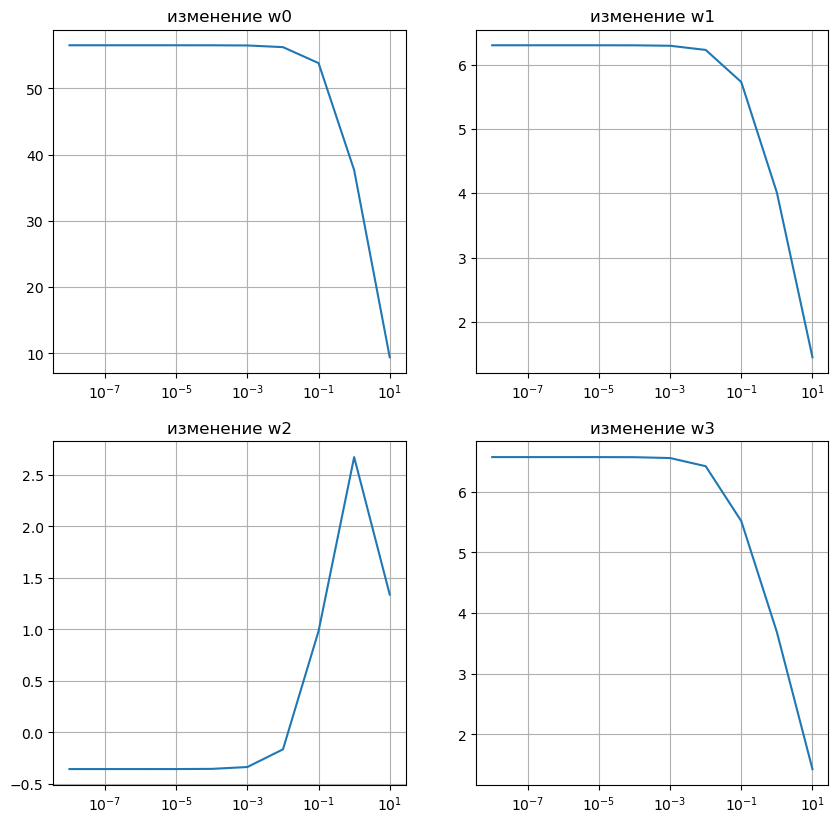

In [32]:
# Создание figure и параметров отрисовки
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), dpi=100)

# График изменения веса w0
ax1.semilogx(reg_list, ar_result[:, 0])
ax1.set(title='изменение w0')
ax1.grid()

# График изменения веса w1
ax2.semilogx(reg_list, ar_result[:, 1])
ax2.set(title='изменение w1')
ax2.grid()

# График изменения веса w2
ax3.semilogx(reg_list, ar_result[:, 2])
ax3.set(title='изменение w2')
ax3.grid()

# График изменения веса w3
ax4.semilogx(reg_list, ar_result[:, 3])
ax4.set(title='изменение w3')
ax4.grid()

plt.show()

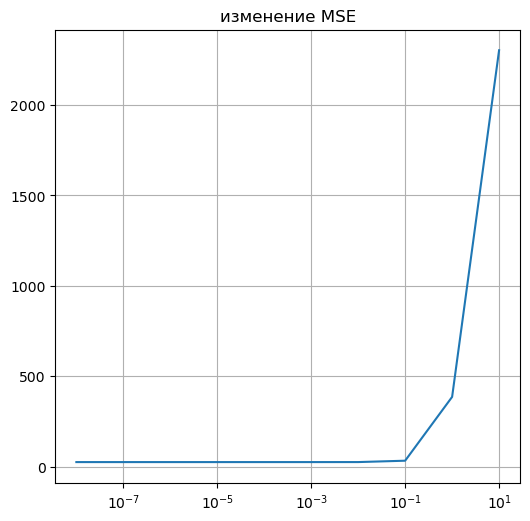

In [33]:
fig, ax1 = plt.subplots(1, figsize=(6, 6), dpi=100)

# График изменения MSE
ax1.semilogx(reg_list, ar_result[:, 4])
ax1.set(title='изменение MSE')
ax1.grid()

plt.show()

#### Задание 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [34]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    mse = calc_mse(y, np.dot(X, W))
    r = W.copy()
    r = np.append(r, mse)
    return r

In [35]:
list_result = []
reg_list = []
d = 1
for l in range(0, 10):
    list_result.append(gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=10/d))
    reg_list.append(10/d)
    d *=10

Iter: 0, weights: [10.46931412  1.94002645  1.52483696  1.95894294], error 3328.9193790557742
Iter: 500, weights: [51.5         3.19551953  0.35827231  3.0826116 ], error 80.0581668211606
Iter: 1000, weights: [51.5         3.16034662  0.44004108  3.03249761], error 80.141062734847
Iter: 1500, weights: [51.5         3.11047559  0.54078802  2.97700484], error 80.24931348104221
Iter: 2000, weights: [51.5         3.06666556  0.63300137  2.92454728], error 80.34915181961833
Iter: 2500, weights: [51.5         3.00402641  0.74751281  2.86828628], error 80.4603541819021
Iter: 3000, weights: [51.5         2.95025621  0.85329817  2.81574076], error 80.49531218529457
Iter: 3500, weights: [51.5         2.88482435  0.99909325  2.77519001], error 79.70718875041142
Iter: 4000, weights: [51.5         2.87076622  1.17767106  2.77977155], error 76.40347434596362
Iter: 4500, weights: [51.5         3.35445059  1.95610258  3.3425031 ], error 79.69218894061608
Final MSE: 79.7499821279272
Iter: 0, weights: [

Iter: 1000, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 1500, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.90461887690847
Iter: 2000, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 2500, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 3000, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 3500, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 4000, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Iter: 4500, weights: [56.49999995  6.30309329 -0.35638825  6.57147599], error 24.904618876908444
Final MSE: 24.904618876908444
Iter: 0, weights: [12.03649021  1.81729624  2.25885179  2.26581179], error 3252.039792164096
Iter: 500, weights: [56.49999999  6.30306517 -0.35625216  6.57136361], error 24.90461888033508
Iter: 1

In [36]:
ar_result = np.asarray(list_result)

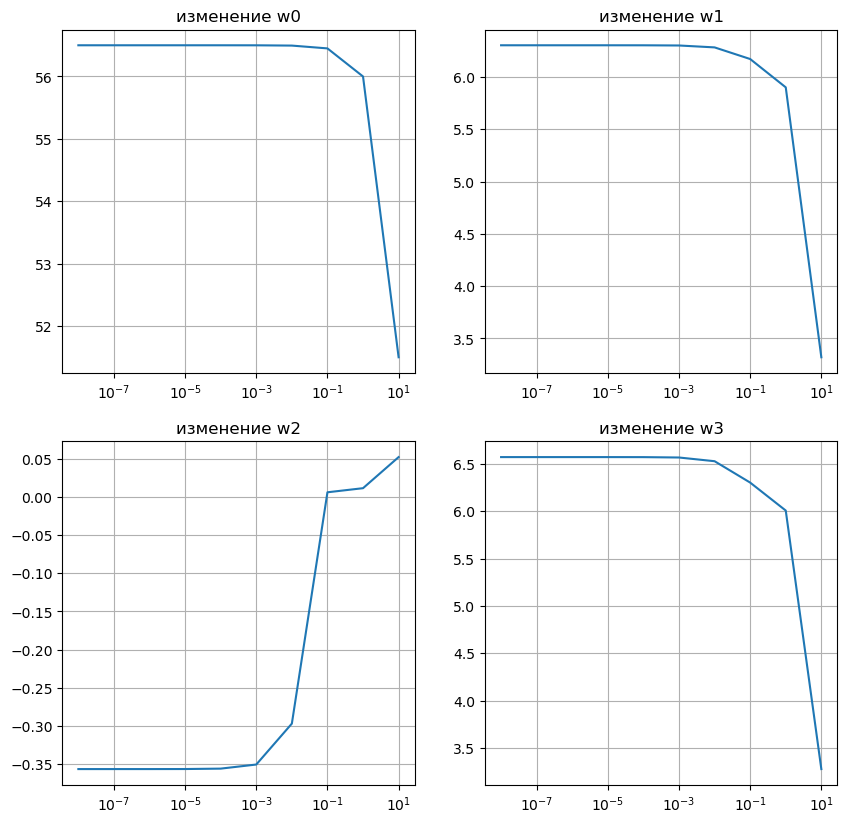

In [37]:
# Создание figure и параметров отрисовки
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10), dpi=100)

# График изменения веса w0
ax1.semilogx(reg_list, ar_result[:, 0])
ax1.set(title='изменение w0')
ax1.grid()

# График изменения веса w1
ax2.semilogx(reg_list, ar_result[:, 1])
ax2.set(title='изменение w1')
ax2.grid()

# График изменения веса w2
ax3.semilogx(reg_list, ar_result[:, 2])
ax3.set(title='изменение w2')
ax3.grid()

# График изменения веса w3
ax4.semilogx(reg_list, ar_result[:, 3])
ax4.set(title='изменение w3')
ax4.grid()

plt.show()

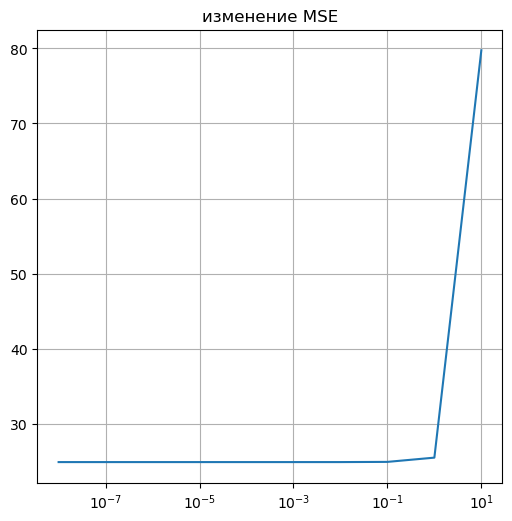

In [38]:
fig, ax1 = plt.subplots(1, figsize=(6, 6), dpi=100)

# График изменения MSE
ax1.semilogx(reg_list, ar_result[:, 4])
ax1.set(title='изменение MSE')
ax1.grid()

plt.show()